#Preprocessing

In [1]:
!nvidia-smi

Sat Dec 25 16:12:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


In [3]:
train_end = 1600
valid_end = 2000
test_end  = 400

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import os

train_x = []
train_y = []

p1 = '/content/drive/My Drive/ResNET/楷書/train'
p2 = '/content/drive/My Drive/ResNET/行書/train'
p3 = '/content/drive/My Drive/ResNET/隸書/train'


for i in os.listdir(p1)[:train_end]:
  img = cv2.imread(p1+'/'+i,cv2.IMREAD_COLOR)
  img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)  # 將大小修改成250*250
  train_x.append(img)
  train_y.append(0)

for i in os.listdir(p2)[:train_end]:
  img = cv2.imread(p2+'/'+i,cv2.IMREAD_COLOR)
  img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)  # 將大小修改成250*250
  train_x.append(img)
  train_y.append(1)

for i in os.listdir(p3)[:train_end]:
  img = cv2.imread(p3+'/'+i,cv2.IMREAD_COLOR)
  img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)  # 將大小修改成250*250
  train_x.append(img)
  train_y.append(2)

train_xx = np.array(train_x).reshape(len(train_x), 224, 224, 3)
print(train_xx.shape) 
train_yy = np.array(train_y).reshape(len(train_y), 1)
print(train_yy.shape)

(4800, 224, 224, 3)
(4800, 1)


In [5]:
val_x = []
val_y = []

for i in os.listdir(p1)[train_end:valid_end]:
  img = cv2.imread(p1+'/'+i,cv2.IMREAD_COLOR)
  img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)  # 將大小修改成250*250
  val_x.append(img)
  val_y.append(0)

for i in os.listdir(p2)[train_end:valid_end]:
  img = cv2.imread(p2+'/'+i,cv2.IMREAD_COLOR)
  img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)  # 將大小修改成250*250
  val_x.append(img)
  val_y.append(1)

for i in os.listdir(p3)[train_end:valid_end]:
  img = cv2.imread(p3+'/'+i,cv2.IMREAD_COLOR)
  img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)  # 將大小修改成250*250
  val_x.append(img)
  val_y.append(2)

val_xx = np.array(val_x).reshape(len(val_x), 224, 224, 3)
print(val_xx.shape) 
val_yy = np.array(val_y).reshape(len(val_y), 1)
print(val_yy.shape)

(1200, 224, 224, 3)
(1200, 1)


In [6]:
test_x = []
test_y = []

p1 = '/content/drive/My Drive/ResNET/楷書/test'
p2 = '/content/drive/My Drive/ResNET/行書/test'
p3 = '/content/drive/My Drive/ResNET/隸書/test'

for i in os.listdir(p1)[:test_end]:
  img = cv2.imread(p1+'/'+i,cv2.IMREAD_COLOR)
  img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)  # 將大小修改成250*250
  test_x.append(img)
  test_y.append(0)

for i in os.listdir(p2)[:test_end]:
  img = cv2.imread(p2+'/'+i,cv2.IMREAD_COLOR)
  img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)  # 將大小修改成250*250
  test_x.append(img)
  test_y.append(1)

for i in os.listdir(p3)[:test_end]:
  img = cv2.imread(p3+'/'+i,cv2.IMREAD_COLOR)
  img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)  # 將大小修改成250*250
  test_x.append(img)
  test_y.append(2)

test_xx = np.array(test_x).reshape(len(test_x), 224, 224, 3)
print(test_xx.shape) 
test_yy = np.array(test_y).reshape(len(test_y), 1)
print(test_yy.shape)

(1200, 224, 224, 3)
(1200, 1)


In [7]:
train_yy = np.eye(3)[train_yy.reshape(-1)]
test_yy = np.eye(3)[test_yy.reshape(-1)]
val_yy = np.eye(3)[val_yy.reshape(-1)]

print(train_xx.shape)
print(train_yy.shape)
print(test_xx.shape)
print(test_yy.shape)
print(val_xx.shape)
print(val_yy.shape)

(4800, 224, 224, 3)
(4800, 3)
(1200, 224, 224, 3)
(1200, 3)
(1200, 224, 224, 3)
(1200, 3)


#ResNET152

In [8]:
from tensorflow.keras.applications import ResNet152

base_model_ResNet152 = ResNet152(weights = "imagenet", include_top=False, input_shape = (224,224, 3))
#base_model_ResNet152 = ResNet152(weights = None, include_top=False, input_shape = (224,224, 3))


#for layer in base_model_ResNet152.layers[:415]: #515層 - 100層
for layer in base_model_ResNet152.layers[:415]: #515層 - 100層
   layer.trainable = False
#base_model_ResNet152.summary()

234708992/234698864 [==============================] - 5s 0us/step


In [9]:
len(base_model_ResNet152.layers)

515

In [10]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Model

# use “get_layer” method to save the last layer of the network
# save the output of the last layer to be the input of the next layer

last_layer = base_model_ResNet152.get_layer('conv5_block3_out')
last_output = last_layer.output

# flatten the classifier input which is output of the last layer of VGG16 model

x = Flatten()(last_output)

In [11]:
# add a 64 unit FC layer and relu activation 
x = Dense(256, activation='relu', name='Dense_1')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(64, activation='relu', name='Dense_2')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

# add our new softmax layer with 2 units
x = Dense(3, activation='softmax', name='softmaxxxx')(x)

# instantiate實例化 a new_model using keras’s Model class
new_model = Model(inputs=base_model_ResNet152.input, outputs=x)
# print the new_model summary
#new_model.summary()

In [12]:
# self.model.optimizer.learning_rate
from tensorflow import keras
class print_lr(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    print(f'Epoch {epoch}, the optimizer state is {self.model.optimizer.get_config()}')

'''
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
csv_logger = CSVLogger('curve_ResNet152.csv')


mc = ModelCheckpoint(
    os.path.join('./result_ResNet152', 'epoch_{epoch}.h5'),
    verbose=2,
    monitor = 'val_loss',
    #monitor = 'val_accuracy',
    save_freq=5*(train_xx.shape[0] // 64),
    mode='min')
'''

"\nfrom tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger\ncsv_logger = CSVLogger('curve_ResNet152.csv')\n\n\nmc = ModelCheckpoint(\n    os.path.join('./result_ResNet152', 'epoch_{epoch}.h5'),\n    verbose=2,\n    monitor = 'val_loss',\n    #monitor = 'val_accuracy',\n    save_freq=5*(train_xx.shape[0] // 64),\n    mode='min')\n"

In [13]:
lr    = 0.0001 #0.0005, 0.00005
decay = 1e-4   #1e-6

num_epochs = 100
batch_size = 32  #64, 128
steps_per_epoch  = train_end // batch_size #4
validation_steps = (valid_end - train_end) // batch_size #2

##Using different Batch_size & Learning_rate

In [14]:
paras = [(0.0001, 32), (0.0001, 64), (0.0005, 32), (0.0005, 64)]
score = [[], [], [], []]
diffr = [[], [], [], []]

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import Adam, SGD
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint 
from sklearn.metrics import confusion_matrix

csv_file =[]
ind = 0

for lr,batch_size in paras:
  print(lr, batch_size)
  
  csv_name    = 'ResNet152_with_' + str(lr) + '_' + str(batch_size) + '.csv'
  folder_name = './result_' + str(lr) + '_' + str(batch_size)
  filepath    = folder_name + '/' + 'model_' + str(lr) + '_' + str(batch_size) + '.h5'
  model_name  = 'ResNet152_Model_' + str(lr) + '_' + str(batch_size) + '.h5'
  csv_file.append(csv_name)

  #開新的csv & 設定mc
  csv_logger = CSVLogger(csv_name)
  mc = ModelCheckpoint(
    os.path.join(folder_name, 'epoch_{epoch}.h5'),
    verbose=2,
    monitor = 'val_loss',
    save_freq=5*(train_xx.shape[0] // 64),
    mode='min')

  optimizer = tf.optimizers.Adam(learning_rate=lr,decay=decay)
  new_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  checkpointer = ModelCheckpoint(filepath=filepath, verbose=1, save_best_only=True) #filepath保存模型的路徑
  history = new_model.fit(train_xx, train_yy, batch_size=batch_size, epochs=num_epochs, callbacks=[mc, csv_logger, print_lr()], steps_per_epoch=steps_per_epoch, validation_data=(val_xx, val_yy), validation_steps=validation_steps, verbose=2, shuffle=True)

  #計算結果
  score[ind] = new_model.evaluate(test_xx, test_yy, verbose=0)
  print('\n', 'Test accuracy:', score[ind][1])
  new_model.save(model_name)

  #找出預測錯誤
  result = new_model.predict(test_xx, use_multiprocessing=True)
  ans = np.zeros((1200,3))
  for i in range(1200):
    temp = result[i]
    val = np.where(temp==np.max(temp))
    val = int(val[0][0])
    ans[i][val] = 1
  for i in range(1200):
    if(np.array_equal(ans[i],test_yy[i]) == False):
      diffr[ind].append(i)

  ind += 1


0.0001 32
Epoch 1/100
Epoch 0, the optimizer state is {'name': 'Adam', 'learning_rate': 1e-04, 'decay': 0.0001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
50/50 - 41s - loss: 0.2353 - accuracy: 0.9181 - val_loss: 0.0221 - val_accuracy: 0.9870 - 41s/epoch - 827ms/step
Epoch 2/100
Epoch 1, the optimizer state is {'name': 'Adam', 'learning_rate': 1e-04, 'decay': 0.0001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
50/50 - 10s - loss: 0.0907 - accuracy: 0.9694 - val_loss: 0.0157 - val_accuracy: 0.9974 - 10s/epoch - 203ms/step
Epoch 3/100
Epoch 2, the optimizer state is {'name': 'Adam', 'learning_rate': 1e-04, 'decay': 0.0001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
50/50 - 10s - loss: 0.0718 - accuracy: 0.9787 - val_loss: 0.0225 - val_accuracy: 0.9896 - 10s/epoch - 203ms/step
Epoch 4/100
Epoch 3, the optimizer state is {'name': 'Adam', 'learning_rate': 1e-04, 'decay': 0.0001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilo

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 7, the optimizer state is {'name': 'Adam', 'learning_rate': 1e-04, 'decay': 0.0001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
50/50 - 14s - loss: 0.0144 - accuracy: 0.9956 - val_loss: 0.0341 - val_accuracy: 0.9896 - 14s/epoch - 281ms/step
Epoch 9/100
Epoch 8, the optimizer state is {'name': 'Adam', 'learning_rate': 1e-04, 'decay': 0.0001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
50/50 - 10s - loss: 0.0085 - accuracy: 0.9987 - val_loss: 0.0304 - val_accuracy: 0.9922 - 10s/epoch - 202ms/step
Epoch 10/100
Epoch 9, the optimizer state is {'name': 'Adam', 'learning_rate': 1e-04, 'decay': 0.0001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
50/50 - 10s - loss: 0.0091 - accuracy: 0.9981 - val_loss: 0.0219 - val_accuracy: 0.9896 - 10s/epoch - 203ms/step
Epoch 11/100
Epoch 10, the optimizer state is {'name': 'Adam', 'learning_rate': 1e-04, 'decay': 0.0001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad

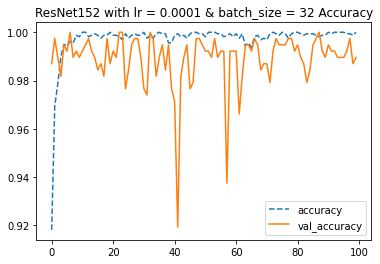

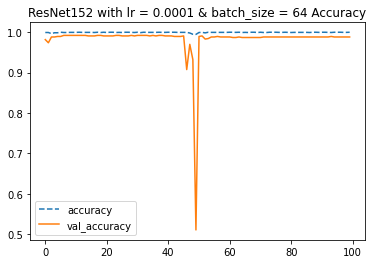

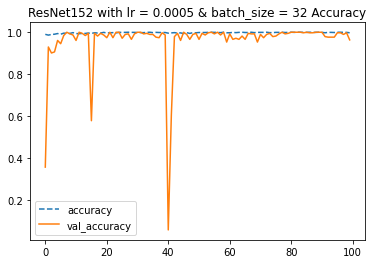

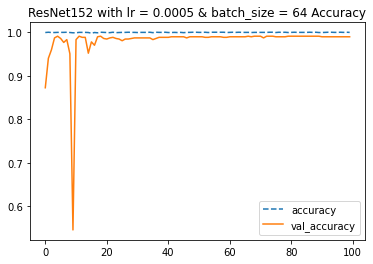

In [17]:
import csv
import matplotlib.pyplot as plt

accuracy     = [[], [], [], []]
loss         = [[], [], [], []]
val_loss     = [[], [], [], []]
val_accuracy = [[], [], [], []]


for i in range(4):
  path = './' + csv_file[i]

  with open(path) as f:
    myCsv = csv.reader(f)
    headers = next(myCsv)
    for row in myCsv:
      #print(row)
      val_accuracy[i].append(float(row[3]))
      val_loss[i].append(float(row[4]))
      loss[i].append(float(row[2]))
      accuracy[i].append(float(row[1]))
    
    lr, bs =  paras[i]

    title = "ResNet152 with lr = " + str(lr) + " & batch_size = " + str(bs) + " Accuracy"
    plt.title(title)
    plt.plot(np.array(list(range(num_epochs))), np.array(accuracy[i][0:num_epochs]), label = "accuracy", linestyle="--")
    plt.plot(np.array(list(range(num_epochs))), np.array(val_accuracy[i][:num_epochs]), label = "val_accuracy", linestyle="-")
    plt.legend()
    plt.show()
    print()

In [18]:
import csv

with open('accuracy_original.csv', 'w', newline='') as acc_file:
    writer = csv.writer(acc_file)
    for i in range(4):
      str1 = 'train accuracy ' + str(i+1)
      str2 = 'validation accuracy ' + str(i+1)
      str3 = 'test accuracy ' + str(i+1)
      str4 = 'prediction error ' + str(i+1)
      
      list1 = [str1]
      list2 = [str2]
      list3 = [str3, 0]
      list4 = [str4]
      list1 = list1 + accuracy[i]
      list2 = list2 + val_accuracy[i]
      list3[1] = score[i][1]
      list4 = list4 + diffr[i]

      writer.writerow(list1)
      writer.writerow(list2)
      writer.writerow(list3)
      writer.writerow(list4)

      list5 = []
      writer.writerow(list5)

In [19]:
from google.colab import files
files.download("accuracy_original.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#暫時關閉

In [20]:
'''
model = tf.keras.models.load_model("model_ResNet152_20211224_0706_20epochs.h5")
model
'''

'\nmodel = tf.keras.models.load_model("model_ResNet152_20211224_0706_20epochs.h5")\nmodel\n'

In [21]:
'''
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='model_ResNet152_20211224_0859_22epochs.h5', verbose=1, save_best_only=True)#filepath保存模型的路徑
history = model.fit(train_xx, train_yy, batch_size=32, epochs=2, callbacks=[mc, csv_logger, print_lr()], steps_per_epoch=4, validation_data=(val_xx, val_yy), validation_steps=2, verbose=2, shuffle=True) # 改成epochs=100
'''

"\nmodel.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])\ncheckpointer = ModelCheckpoint(filepath='model_ResNet152_20211224_0859_22epochs.h5', verbose=1, save_best_only=True)#filepath保存模型的路徑\nhistory = model.fit(train_xx, train_yy, batch_size=32, epochs=2, callbacks=[mc, csv_logger, print_lr()], steps_per_epoch=4, validation_data=(val_xx, val_yy), validation_steps=2, verbose=2, shuffle=True) # 改成epochs=100\n"

In [22]:
# loss: 0.0495 - accuracy: 0.9922 - val_loss: 0.3787 - val_accuracy: 0.9062 